# Workshop - Bagging & RandomForest & Boosting 

## 0x000 Imports & Inits

- **Dataset** : `sklearn:digits`
- **Number of classes** : 10
- **Number of elements** : 1797
- **Number of attributes** : 64 (8x8 pixels)

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

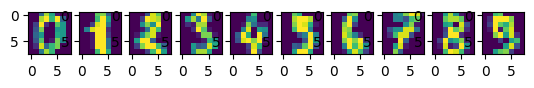

In [2]:
digits = load_digits()

fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [3]:
# Obtaining the matrix feature and the target vector
X, y = digits.data, digits.target

In [4]:
def m_accuracy(model):
    '''
    returns: the accuracy of the given model, on the digits dataset
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = model
    clf.fit(X_train, y_train)
    return clf.score(X_test,y_test)

def m_accuracy_mv(model, N:int):
    '''
    returns: the tupple (mean, std_var)
    '''

    accuracies = [ m_accuracy(model) for i in range(N) ]
    return (np.mean(accuracies), np.std(accuracies))

## 0x100 Training a model on the entire dataset

In [5]:
# Training the model on the entire dataset
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

# The total proportion of observations correctly classified by the model
accuracy = clf.score(X,y)
print(accuracy)

1.0


## 0x200 Training on a portion of data

In [6]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7008652657601978


In [7]:
# *Q* : Construire la variance de la valeur accuracy sur 100 
#       tirages pour la séparation apprentissage/test.

clf = tree.DecisionTreeClassifier()
mean, std_var = m_accuracy_mv(clf, 100)
print(mean, std_var)

0.8493333333333334 0.03945054725871804


## 0x300 Bagging

In [8]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(accuracy)

0.9777777777777777


In [9]:
# Calculer la variance de la valeur accuracy sur 100 tirages
# pour la séparation apprentissage/test.

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
mean, std_var = m_accuracy_mv(clf, 100)
print(mean, std_var)

0.9758888888888889 0.017145348143533364


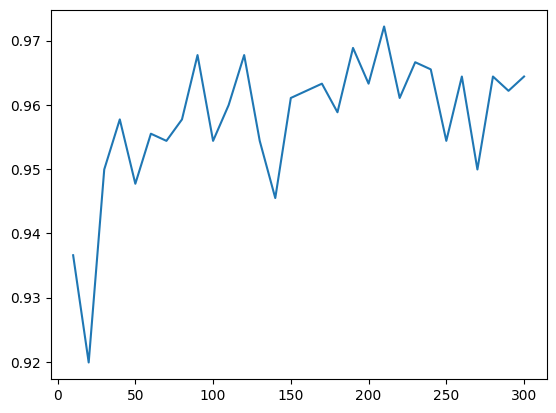

In [10]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [11]:
pgrid = {
    "max_samples" : [0.2, 0.4, 0.6, 0.8],
    "max_features": [0.2, 0.4, 0.6, 0.8]
}

clf = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
clf.fit(X_train, y_train)
best_estimator = clf.best_estimator_

print(f"best score: {best_estimator.score(X, y)}")
print(f"max_sambles: {best_estimator.max_samples}")
print(f"max_features: {best_estimator.max_features}")

best score: 0.9554813578185866
max_sambles: 0.8
max_features: 0.4


## 0x400 RandomForest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9066749072929543


In [13]:
# Comparing DecisionTree & Bagging & RandomForest

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(f"DecisionTree['accuracy': {clf.score(X_test, y_test)}]")

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
print(f"Bagging['accuracy': {clf.score(X_test, y_test)}]")

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
print(f"RandomForest['accuracy': {clf.score(X_test, y_test)}]")

DecisionTree['accuracy': 0.7008652657601978]
Bagging['accuracy': 0.8912237330037083]
RandomForest['accuracy': 0.9103831891223733]


In [14]:
# Comparaison Bagging & RandomFrest

N = 100
bagging_clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
bagging_mean, bagging_std_var = m_accuracy_mv(bagging_clf, N)

rf_clf = RandomForestClassifier(n_estimators=30)
rf_mean, rf_std_var = m_accuracy_mv(rf_clf, N)

print(f"Bagging['mean': {bagging_mean}, 'std_var': {bagging_std_var}]")
print(f"RandomForest['mean': {rf_mean}, 'std_var': {rf_std_var}]")

Bagging['mean': 0.9472222222222223, 'std_var': 0.02289940427280549]
RandomForest['mean': 0.9713333333333333, 'std_var': 0.017226164423363097]


In [15]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
df = pd.DataFrame(data=[], columns=['n_estimators', 'accuracy'])

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    df.loc[len(df)] = [int((i + 1) * 10), clf.score(X_test,y_test)]

df.head(15)

,n_estimators,accuracy
0,10.0,0.939933
1,20.0,0.954394
2,30.0,0.967742
3,40.0,0.967742
4,50.0,0.962180
5,60.0,0.975528
6,70.0,0.972191
7,80.0,0.974416
8,90.0,0.972191
9,100.0,0.975528


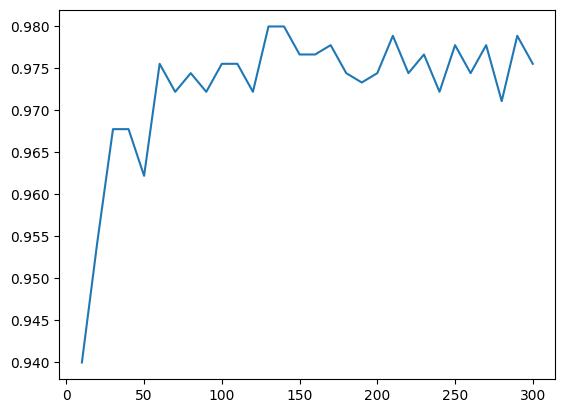

In [16]:
plt.plot(df['n_estimators'], df['accuracy'])
plt.show()

## 0x500 Boosting

In [17]:
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9744160177975528


In [18]:
N = 15
accuracy = []

df = pd.DataFrame(data=[], columns=['max_depth', 'accuracy'])

for i in range(1, N):
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=i), n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    df.loc[len(df)] = [int(i), clf.score(X_test,y_test)]

df.head(15)

,max_depth,accuracy
0,1.0,0.767519
1,2.0,0.917686
2,3.0,0.942158
3,4.0,0.959956
4,5.0,0.967742
5,6.0,0.979978
6,7.0,0.982202
7,8.0,0.982202
8,9.0,0.984427
9,10.0,0.979978


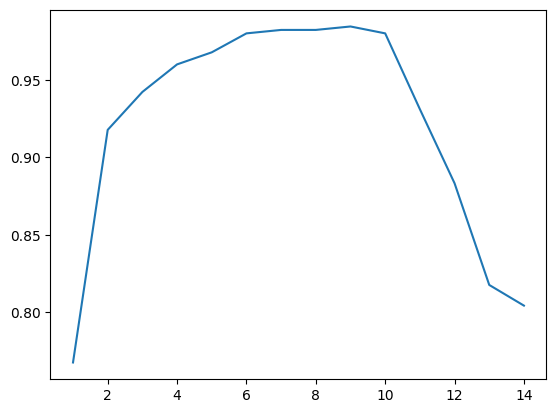

In [19]:
plt.plot(df['max_depth'], df['accuracy'])
plt.show()